In [9]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans


In [10]:
# load dataset
df = pd.read_csv('dataset/Mall_Customers.csv')

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# rename columns
df.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

In [13]:
# check for missing values
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [14]:
# check for duplicates
df.duplicated().sum()

0

In [15]:
#drop uselest column
X = df.drop(['CustomerID','Gender'], axis=1)

In [16]:
X.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Text(3, 82900.10926364959, 'Elbow Method')

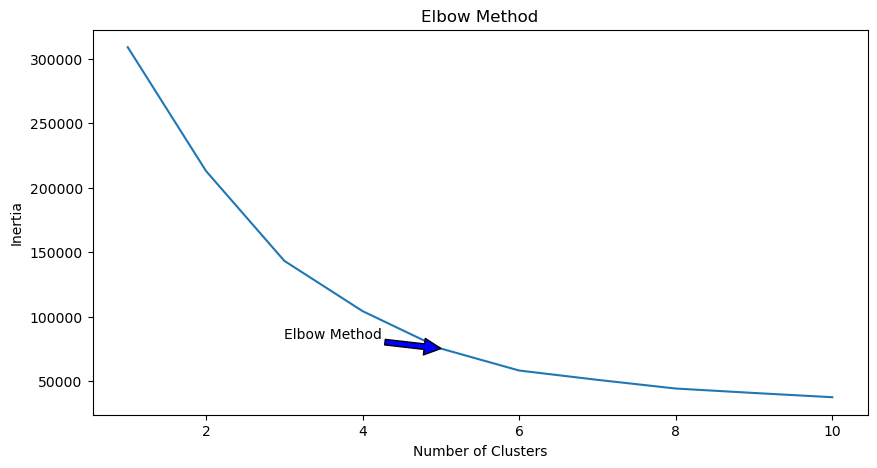

In [20]:
#create clusters with elbow method
clusters = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)

#create visualization

fig,ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=range(1,11), y=clusters, ax=ax)
ax.set_title('Elbow Method')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')

# set annotate
ax.annotate('Elbow Method', xy=(5,clusters[4]), xytext=(3,clusters[4]*1.1), arrowprops=dict(facecolor='blue'))


In [21]:
# clustering

n_clust = 5
kmeans = KMeans(n_clusters=n_clust, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

X['label'] = kmeans.labels_


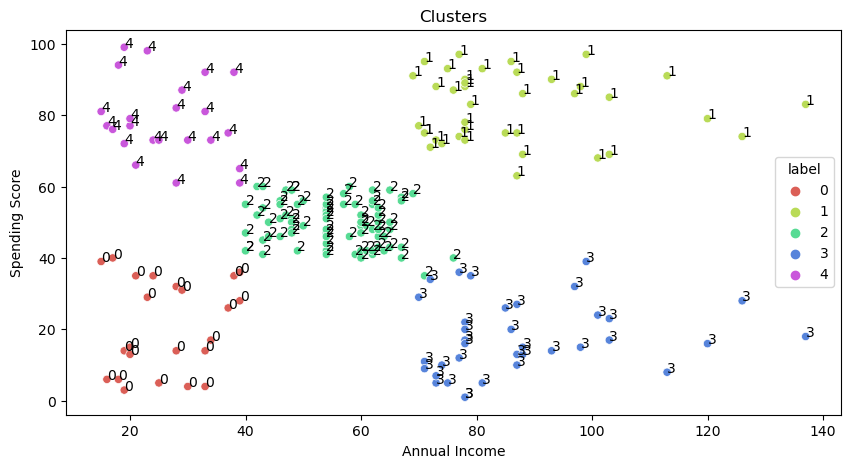

In [28]:
# create visualization
fig,ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x=X['Annual_Income'], y=X['Spending_Score'], hue=X['label'], ax=ax,palette=sns.color_palette('hls',n_clust))
ax.set_title('Clusters')
ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending Score')

for i, txt in enumerate(X['label']):
    ax.annotate(txt, (X['Annual_Income'][i], X['Spending_Score'][i]))


In [31]:
X.sample(10)

,Age,Annual_Income,Spending_Score,label
40,65,38,35,0
161,29,79,83,1
79,49,54,42,2
184,41,99,39,3
35,21,33,81,4
134,20,73,5,3
174,52,88,13,3
3,23,16,77,4
169,32,87,63,1
19,35,23,98,4


In [32]:
X.to_csv('dataset/Customers_Clusters.csv')